# Task 1: Linear Regression [1.5 points]

In [1]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_1d = path.abspath("dataset/regression/train_1d_reg_data.csv")
train_2d = path.abspath("dataset/regression/train_2d_reg_data.csv")

test_1d = path.abspath("dataset/regression/test_1d_reg_data.csv")
test_2d = path.abspath("dataset/regression/test_2d_reg_data.csv")

In [3]:
def h(x, weights):
    return x.dot(weights)

In [4]:
def calculateWeights(X, y):
    return np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))

In [5]:
def preprocessData(filePath, xs):
    df = pd.read_csv(filePath)
    X = df[xs]
    X.insert(0, 'x0', 1, True) # Add new dimension because of merging bias into weight vector --> w0 = bias
    y = df[['y']]
    return X, y, df

In [6]:
def meanSquaredError(y_pred, y_actual):
    errorFrame = pd.DataFrame(columns=['y_pred', 'y_actual', 'mse'])
    errorFrame['y_pred'] = y_pred['y']
    errorFrame['y_actual'] = y_actual['y']
    errorFrame['mse'] = (y_pred['y'] - y_actual['y'])**2

    model_error = sum(errorFrame['mse'])/len(errorFrame['mse'])
    return model_error


## Training 1d

In [7]:
X_train, y_train, df_train = preprocessData(train_1d, ['x1'])

In [8]:
X_train.head()

,x0,x1
0,1,0.418
1,1,0.722
2,1,0.000
3,1,0.303
4,1,0.147


In [9]:
weights = calculateWeights(X_train, y_train)

pred_ys_train = h(X_train, weights)
pred_ys_train = pred_ys_train.rename(columns={0: 'y'})

## Trained weights 1d

In [10]:
print(f"bias:\t{weights[0][0]}\nslope:\t{weights[1][0]}")

bias:	0.19558660470154954
slope:	0.6128879513156806


## Trained model error 1d

In [11]:
trained_model_error = meanSquaredError(pred_ys_train, y_train)
print(f"(Trained 1D-model error is:\t {round(trained_model_error, 4)}\n ~ {(round(trained_model_error, 4))*100}%")

(Trained 1D-model error is:	 0.0138
 ~ 1.38%


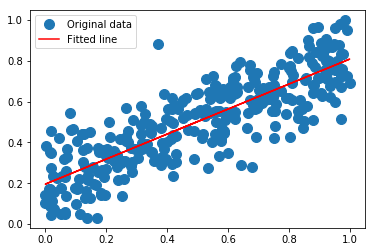

In [12]:
X_train = X_train.drop(['x0'], axis=1)
plt.plot(X_train, y_train, 'o', label='Original data', markersize=10)
plt.plot(X_train, pred_ys_train, 'r', label='Fitted line')
plt.legend()
plt.show()

## Test 1_d

In [13]:
X_test, y_test, df_test = preprocessData(test_1d, ['x1'])

In [14]:
pred_ys_test = h(X_test, weights)
pred_ys_test = pred_ys_test.rename(columns={0: 'y'})

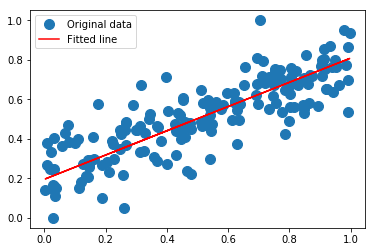

In [15]:
X_test = X_test.drop(['x0'], axis=1)
plt.plot(X_test, y_test, 'o', label='Original data', markersize=10)
plt.plot(X_test, pred_ys_test, 'r', label='Fitted line')
plt.legend()
plt.show()

## Test model error 1d

In [16]:
test_model_error = meanSquaredError(pred_ys_test, y_test)
print(f"Test 1D-model error is:\t {round(test_model_error, 4)}\n ~ {(round(test_model_error, 4))*100}%")

Test 1D-model error is:	 0.0124
 ~ 1.24%


## Training 2d


In [17]:
X_train_2d, y_train_2d, df_train_2d = preprocessData(train_2d, ['x1', 'x2'])

In [18]:
X_train_2d.head()

,x0,x1,x2
0,1,0.418,0.438
1,1,0.722,0.606
2,1,0.000,0.102
3,1,0.303,0.323
4,1,0.147,0.130


In [19]:
weights_2d = calculateWeights(X_train_2d, y_train_2d)

pred_ys_train_2d = h(X_train_2d, weights_2d)

In [20]:
pred_ys_train_2d = pred_ys_train_2d.rename(columns={0:'y'})

## Trained weights 2d

In [22]:
print(f"w0 = bias:\t{weights_2d[0][0]}\nw1:\t\t{weights_2d[1][0]}\nw2:\t\t{weights_2d[2][0]}")

w0 = bias:	0.24079270870924852
w1:		0.48155685507192203
w2:		0.05864390258297192


## Trained model error 2d

In [29]:
trained_model_error_2d = meanSquaredError(pred_ys_train_2d, y_train_2d)
print(f"(Trained 2D-model error is:\t {round(trained_model_error_2d, 4)}\n ~ {(round(trained_model_error_2d, 4))*100}%")

(Trained 2D-model error is:	 0.0104
 ~ 1.04%


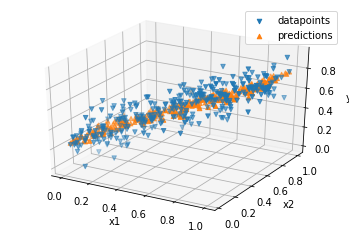

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

datapoints = ax.scatter(X_train_2d['x1'], X_train_2d['x2'], y_train_2d, marker='v')
predictions = ax.scatter(X_train_2d['x1'], X_train_2d['x2'], pred_ys_train_2d, marker='^')

ax.legend([datapoints, predictions], ['datapoints', 'predictions'], numpoints=1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## Test 2d

In [25]:
X_test_2d, y_test_2d, df_test_2d = preprocessData(test_2d, ['x1', 'x2'])

In [26]:
pred_ys_test_2d = h(X_test_2d, weights_2d)
pred_ys_test_2d = pred_ys_test_2d.rename(columns={0: 'y'})

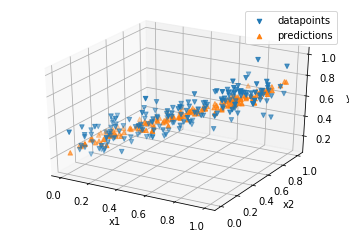

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

datapoints = ax.scatter(X_test_2d['x1'], X_test_2d['x2'], y_test_2d, marker='v')
predictions = ax.scatter(X_test_2d['x1'], X_test_2d['x2'], pred_ys_test_2d, marker='^')

ax.legend([datapoints, predictions], ['datapoints', 'predictions'], numpoints=1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## Test model error 2d

In [30]:
test_model_error_2d = meanSquaredError(pred_ys_test_2d, y_test_2d)
print(f"Test 2D-model error is:\t {round(test_model_error_2d, 4)}\n ~ {(round(test_model_error_2d, 4))*100}%")

Test 2D-model error is:	 0.0095
 ~ 0.95%
